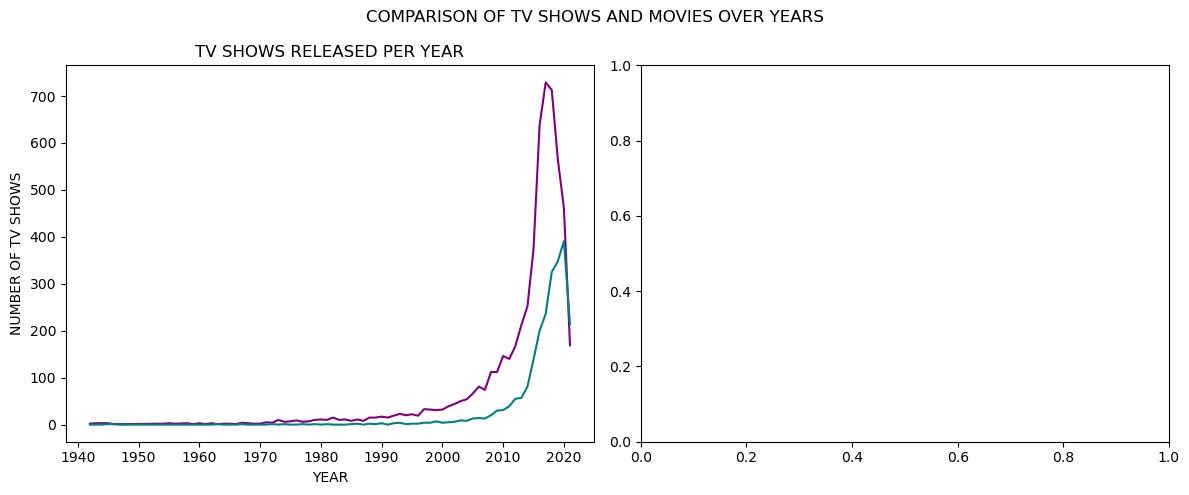

In [13]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt

#upload the data

df=pd.read_csv("netflix_titles.csv.zip")

#cleaning data 

df=df.dropna(subset=['type','country','rating','release_year','duration'])

#which one has published more? tv shows or movies ?

type_counts=df['type'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','pink'])
plt.title('TV SHOWS V/S MOVIES')
plt.xlabel('TYPE')
plt.ylabel('COUNT')
plt.tight_layout()
plt.savefig('MOVIES AND TV SHOWS STATS ABOUT PUBLISHMENT')
plt.show()

#comparison in the terms of rating displayed by pie chart 

rating_counts=df['rating'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1f%%')
plt.title('RATING STATS')
plt.tight_layout()
plt.savefig('CONTENT RATING')
plt.show()

#duration of movies represented by histogram

movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title("Distribution of movies duration")
plt.xlabel("Duration of movies")
plt.ylabel("Number of movies")
plt.savefig('movies_duration_histogram')
plt.tight_layout()
plt.show()

#release year and number of movies by a scatter graph 

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title("RELEASE YEAR V/S NUMBER OF MOVIES")
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter_plot_release_of_movies_years")
plt.show()

#bar chart ananlysis on top 10 countries by the number of shows they have released in their country
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title("TOP 10 COUNTRIES BY NUMBER OF SHOWS ")
plt.xlabel("NUMBER OF SHOWS")
plt.ylabel("COUNTRIES")
plt.tight_layout()
plt.savefig("bar_graph_of_countries_having_number_of_shows")
plt.show()

content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(1,2,figsize=(12,5))

#first subplot movies

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='purple')
ax[0].set_title("MOVIES RELEASED PER YEAR")
ax[0].set_xlabel('YEAR')
ax[0].set_ylabel('NUMBER OF MOVIES')

#second subplot for tv shows

ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='teal')
ax[0].set_title("TV SHOWS RELEASED PER YEAR")
ax[0].set_xlabel('YEAR')
ax[0].set_ylabel('NUMBER OF TV SHOWS')

fig.suptitle('COMPARISON OF TV SHOWS AND MOVIES OVER YEARS')

plt.tight_layout()
plt.savefig("subplot")
plt.show()

                            






